In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)



In [2]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

y_pred=ppn.predict(X_test_std)
print('Misclassified examples: %d'%(y_test!=y_pred).sum())

Misclassified examples: 1


/home/nozaki/14_ML/python-machine-learning-book-3rd-edition/note/Classification/Logictic-Regression/Plot_Decision_Regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


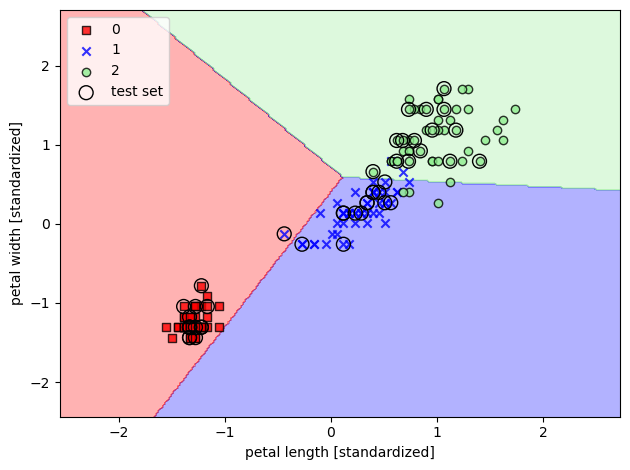

In [3]:
import matplotlib.pyplot as plt
from Plot_Decision_Regions import plot_decision_regions

X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



完全な線形分離が不可能なパーセプトロンアルゴリズムは収束しない

[7.02691913 6.58586033 5.11048996]


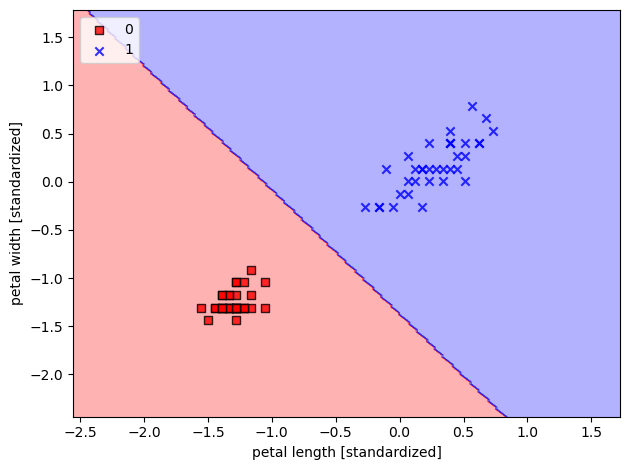

In [4]:
from ADALINE_Logistic import LogisticRegressionGD
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

print(lrgd.w_)
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

scikit-learnでより最適なモデル学習を行ってみる

/home/nozaki/14_ML/python-machine-learning-book-3rd-edition/note/Classification/Logictic-Regression/Plot_Decision_Regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


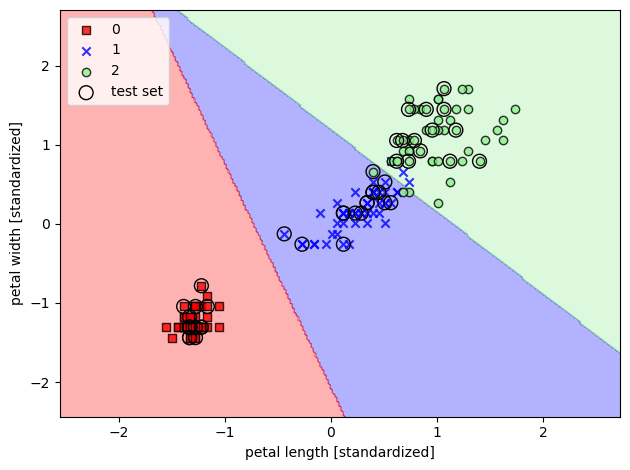

In [6]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=100.0,random_state=1,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
print(lr.predict_proba(X_test_std[:4,:]))

print(lr.predict_proba(X_test_std[:4,:]).sum(axis=1))

[[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]
 [1.22837128e-05 6.94113176e-01 3.05874540e-01]]
[1. 1. 1. 1.]
